In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-in-usa/us_covid19_daily.csv
/kaggle/input/covid19-in-usa/us_counties_covid19_daily.csv
/kaggle/input/covid19-in-usa/us_states_covid19_daily.csv


In [3]:
# imported coronavirus dataset and created a dataframe with the headers representing the columns of my data

headers = ["date", "states", "positive", "negative", "pending", "hospitalizedCurrently", "hospitalizedCumulative", "inIcuCurrently","inIcuCumulative", "onVentilatorCurrently", "onVentilatorCumulative", "recovered", "dateChecked", "death", "hospitalized", "lastModified", "total", "totalTestResults", "posNeg", "deathIncrease", "hospitalizedIncrease", "negativeIncrease", "positiveIncrease", "totalTestResultsIncrease", "hash"]
path = "../input/covid19-in-usa/us_covid19_daily.csv"
coviddf=pd.read_csv(path, names = headers)
coviddf


,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
1,20200705,56,2881016,32631900,1885,38738,248745,5652,11010,2080,...,2020-07-05T00:00:00Z,35514801,35512916,35512916,209,590,611938,42551,654489,f7e6b4e51d342422f4e82b45ff3a970b0b672801
2,20200704,56,2838465,32019962,2083,38136,248155,5628,10977,1982,...,2020-07-04T00:00:00Z,34860510,34858427,34858427,306,871,592524,52406,644930,46fee24f8bdffa6811b613f4d31cc583f6436abe
3,20200703,56,2786059,31427438,2237,37750,247284,5589,10936,2049,...,2020-07-03T00:00:00Z,34215734,34213497,34213497,635,1562,663492,57562,721054,1c411a99c1d22058187d2c2c5c2b26c93dda480a
4,20200702,56,2728497,30763946,2208,37473,245722,5624,10816,2105,...,2020-07-02T00:00:00Z,33494651,33492443,33492443,670,1876,611400,53684,665084,990f258b7628211060263287f2ae1594aa0b152d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,20200126,1,2,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-26T00:00:00Z,2,2,2,0,0,0,0,0,e1cf59ab48e1cf367c4a6798a508a23d9d36bd18
163,20200125,1,2,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-25T00:00:00Z,2,2,2,0,0,0,0,0,bef2a1d5f2a13491e0e0369bbd46c10cdd12973b
164,20200124,1,2,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-24T00:00:00Z,2,2,2,0,0,0,0,0,bfffe76fc0b7cf11efe8aecd3cc7b22598d77d61
165,20200123,1,2,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-23T00:00:00Z,2,2,2,0,0,0,0,0,cee36ebf3174bf1df0daa36e1e8088a157406fad


In [4]:
# for loop that counts missing values in all of my data columns 

missing_data = coviddf.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

date
False    167
Name: date, dtype: int64

states
False    167
Name: states, dtype: int64

positive
False    167
Name: positive, dtype: int64

negative
False    167
Name: negative, dtype: int64

pending
False    125
True      42
Name: pending, dtype: int64

hospitalizedCurrently
False    112
True      55
Name: hospitalizedCurrently, dtype: int64

hospitalizedCumulative
False    125
True      42
Name: hospitalizedCumulative, dtype: int64

inIcuCurrently
False    103
True      64
Name: inIcuCurrently, dtype: int64

inIcuCumulative
False    104
True      63
Name: inIcuCumulative, dtype: int64

onVentilatorCurrently
False    104
True      63
Name: onVentilatorCurrently, dtype: int64

onVentilatorCumulative
False    97
True     70
Name: onVentilatorCumulative, dtype: int64

recovered
False    104
True      63
Name: recovered, dtype: int64

dateChecked
False    167
Name: dateChecked, dtype: int64

death
False    132
True      35
Name: death, dtype: int64

hospitalized
False    125
True     

In [5]:
# replace missing values with 0

coviddf["negative"].replace(np.nan, 0, inplace=True)
coviddf["pending"].replace(np.nan, 0, inplace=True)
coviddf["hospitalizedCurrently"].replace(np.nan, 0, inplace=True)
coviddf["hospitalizedCumulative"].replace(np.nan, 0 , inplace=True)
coviddf["inIcuCurrently"].replace(np.nan,0, inplace=True)
coviddf["inIcuCumulative"].replace(np.nan,0, inplace=True)
coviddf["onVentilatorCurrently"].replace(np.nan,0, inplace=True)
coviddf["onVentilatorCumulative"].replace(np.nan,0, inplace=True)
coviddf["recovered"].replace(np.nan,0, inplace=True)
coviddf["death"].replace(np.nan,0, inplace=True)
coviddf["hospitalized"].replace(np.nan,0, inplace=True)
coviddf
pd.options.display.max_rows
pd.options.display.max_columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
coviddf

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dateChecked,death,hospitalized,lastModified,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dateChecked,death,hospitalized,lastModified,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
1,20200705,56,2881016,32631900,1885,38738,248745,5652,11010,2080,1064,906763,2020-07-05T00:00:00Z,122673,248745,2020-07-05T00:00:00Z,35514801,35512916,35512916,209,590,611938,42551,654489,f7e6b4e51d342422f4e82b45ff3a970b0b672801
2,20200704,56,2838465,32019962,2083,38136,248155,5628,10977,1982,1063,894325,2020-07-04T00:00:00Z,122464,248155,2020-07-04T00:00:00Z,34860510,34858427,34858427,306,871,592524,52406,644930,46fee24f8bdffa6811b613f4d31cc583f6436abe
3,20200703,56,2786059,31427438,2237,37750,247284,5589,10936,2049,1059,883561,2020-07-03T00:00:00Z,122158,247284,2020-07-03T00:00:00Z,34215734,34213497,34213497,635,1562,663492,57562,721054,1c411a99c1d22058187d2c2c5c2b26c93dda480a
4,20200702,56,2728497,30763946,2208,37473,245722,5624,10816,2105,1041,875127,2020-07-02T00:00:00Z,121523,245722,2020-07-02T00:00:00Z,33494651,33492443,33492443,670,1876,611400,53684,665084,990f258b7628211060263287f2ae1594aa0b152d
5,20200701,56,2674813,30152546,2604,36360,243846,5509,10752,2098,1027,823151,2020-07-01T00:00:00Z,120853,243846,2020-07-01T00:00:00Z,32829963,32827359,32827359,701,1438,580277,52982,633259,72c65eddd91c44a91d30f3940ecbb03794f342e7
6,20200630,56,2621831,29572269,2432,35231,242408,5421,10669,2044,1008,813788,2020-06-30T00:00:00Z,120152,242408,2020-06-30T00:00:00Z,32196532,32194100,32194100,596,1582,592335,44358,636693,501168323f02aabeb0b9768a65d9dac0e9cb9040
7,20200629,56,2577473,28979934,2194,33567,240826,5378,10542,2011,990,798360,2020-06-29T00:00:00Z,119556,240826,2020-06-29T00:00:00Z,31559601,31557407,31557407,330,670,532904,36490,569394,9d4179bcdf048ddac05f6f5ccc8e7294b0c15b1c
8,20200628,56,2540983,28447030,2198,32475,240156,5245,10473,2077,983,778321,2020-06-28T00:00:00Z,119226,240156,2020-06-28T00:00:00Z,30990211,30988013,30988013,271,580,544208,42161,586369,4bb38d32b29c0e37c2d915711a72579834cff523
9,20200627,56,2498822,27902822,2186,32476,239576,5311,10415,2159,977,772465,2020-06-27T00:00:00Z,118955,239576,2020-06-27T00:00:00Z,30403830,30401644,30401644,509,1057,547406,43471,590877,9f5e9d15d5285724f677e6c8cadb23b26337f574


In [6]:
# check for duplicate rows of data in each of my columns

coviddf.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [7]:
coviddf['positive'] = pd.to_numeric(coviddf['positive'], errors='coerce').fillna(0)
coviddf['date'] = pd.to_numeric(coviddf['date'], errors='coerce').fillna(0)
coviddf['states'] = pd.to_numeric(coviddf['states'], errors='coerce').fillna(0)
coviddf['negative'] = pd.to_numeric(coviddf['negative'], errors='coerce').fillna(0)
coviddf['pending'] = pd.to_numeric(coviddf['pending'], errors='coerce').fillna(0)
coviddf['hospitalizedCurrently'] = pd.to_numeric(coviddf['hospitalizedCurrently'], errors='coerce').fillna(0)
coviddf['hospitalizedCumulative'] = pd.to_numeric(coviddf['hospitalizedCumulative'], errors='coerce').fillna(0)
coviddf['inIcuCurrently'] = pd.to_numeric(coviddf['inIcuCurrently'], errors='coerce').fillna(0)
coviddf['inIcuCumulative'] = pd.to_numeric(coviddf['inIcuCumulative'], errors='coerce').fillna(0)
coviddf['onVentilatorCurrently'] = pd.to_numeric(coviddf['onVentilatorCurrently'], errors='coerce').fillna(0)
coviddf['onVentilatorCumulative'] = pd.to_numeric(coviddf['onVentilatorCumulative'], errors='coerce').fillna(0)
coviddf['recovered'] = pd.to_numeric(coviddf['recovered'], errors='coerce').fillna(0)
coviddf['dateChecked'] = pd.to_numeric(coviddf['dateChecked'], errors='coerce').fillna(0)
coviddf['death'] = pd.to_numeric(coviddf['death'], errors='coerce').fillna(0)
coviddf['hospitalized'] = pd.to_numeric(coviddf['hospitalized'], errors='coerce').fillna(0)
coviddf['lastModified'] = pd.to_numeric(coviddf['lastModified'], errors='coerce').fillna(0)
coviddf['total'] = pd.to_numeric(coviddf['total'], errors='coerce').fillna(0)
coviddf['totalTestResults'] = pd.to_numeric(coviddf['totalTestResults'], errors='coerce').fillna(0)
coviddf['posNeg'] = pd.to_numeric(coviddf['posNeg'], errors='coerce').fillna(0)
coviddf['deathIncrease'] = pd.to_numeric(coviddf['deathIncrease'], errors='coerce').fillna(0)
coviddf['hospitalizedIncrease'] = pd.to_numeric(coviddf['hospitalizedIncrease'], errors='coerce').fillna(0)
coviddf['negativeIncrease'] = pd.to_numeric(coviddf['negativeIncrease'], errors='coerce').fillna(0)
coviddf['positiveIncrease'] = pd.to_numeric(coviddf['positiveIncrease'], errors='coerce').fillna(0)
coviddf['totalTestResultsIncrease'] = pd.to_numeric(coviddf['totalTestResultsIncrease'], errors='coerce').fillna(0)
coviddf['hash'] = pd.to_numeric(coviddf['hash'], errors='coerce').fillna(0)

In [8]:
# convert all of my variables from type object to int to streamline analysis

coviddf['positive']=coviddf['positive'].astype(int)
coviddf['date']=coviddf['date'].astype(int)
coviddf['states']=coviddf['states'].astype(int)
coviddf['negative']=coviddf['negative'].astype(int)
coviddf['pending']=coviddf['pending'].astype(int)
coviddf['hospitalizedCurrently']=coviddf['hospitalizedCurrently'].astype(int)
coviddf['hospitalizedCumulative']=coviddf['hospitalizedCumulative'].astype(int)
coviddf['inIcuCurrently']=coviddf['inIcuCurrently'].astype(int)
coviddf['inIcuCumulative']=coviddf['inIcuCumulative'].astype(int)
coviddf['onVentilatorCurrently']=coviddf['onVentilatorCurrently'].astype(int)
coviddf['onVentilatorCumulative']=coviddf['onVentilatorCumulative'].astype(int)
coviddf['recovered']=coviddf['recovered'].astype(int)
coviddf['dateChecked']=coviddf['dateChecked'].astype(int)
coviddf['death']=coviddf['death'].astype(int)
coviddf['hospitalized']=coviddf['hospitalized'].astype(int)
coviddf['lastModified']=coviddf['lastModified'].astype(int)
coviddf['total']=coviddf['total'].astype(int)
coviddf['totalTestResults']=coviddf['totalTestResults'].astype(int)
coviddf['posNeg']=coviddf['posNeg'].astype(int)
coviddf['deathIncrease']=coviddf['deathIncrease'].astype(int)
coviddf['hospitalizedIncrease']=coviddf['hospitalizedIncrease'].astype(int)
coviddf['negativeIncrease']=coviddf['negativeIncrease'].astype(int)
coviddf['positiveIncrease']=coviddf['positiveIncrease'].astype(int)
coviddf['totalTestResultsIncrease']=coviddf['totalTestResultsIncrease'].astype(int)
coviddf['hash']=coviddf['hash'].astype(int)

In [9]:
# check to make sure my data types are changed to type int

coviddf.dtypes

date                        int64
states                      int64
positive                    int64
negative                    int64
pending                     int64
hospitalizedCurrently       int64
hospitalizedCumulative      int64
inIcuCurrently              int64
inIcuCumulative             int64
onVentilatorCurrently       int64
onVentilatorCumulative      int64
recovered                   int64
dateChecked                 int64
death                       int64
hospitalized                int64
lastModified                int64
total                       int64
totalTestResults            int64
posNeg                      int64
deathIncrease               int64
hospitalizedIncrease        int64
negativeIncrease            int64
positiveIncrease            int64
totalTestResultsIncrease    int64
hash                        int64
dtype: object

In [10]:
# list of summary statistics for all my variables 

coviddf.describe()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dateChecked,death,hospitalized,lastModified,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
count,1.670000e+02,167.000000,1.670000e+02,1.670000e+02,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.0,167.000000,167.000000,167.0,1.670000e+02,1.670000e+02,1.670000e+02,167.000000,167.000000,167.000000,167.000000,167.000000,167.0
mean,2.007945e+07,41.011976,8.679279e+05,7.331069e+06,6756.940120,24206.299401,94903.766467,5407.185629,3631.485030,2342.347305,323.856287,211524.047904,0.0,44214.413174,94903.766467,0.0,8.205754e+06,8.198997e+06,8.198997e+06,734.568862,1489.491018,195400.598802,17251.580838,212652.179641,0.0
std,1.563155e+06,23.973878,9.080344e+05,9.493382e+06,14542.593525,21494.338088,94476.159073,5234.526486,4056.891147,2346.793195,359.054452,281255.145358,0.0,46609.654096,94476.159073,0.0,1.036863e+07,1.037141e+07,1.037141e+07,762.373707,2017.909230,199051.427398,14516.196422,210587.853225,0.0
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-2841.000000,-5.000000,0.000000,0.000000,0.0
25%,2.020030e+07,3.000000,5.195000e+02,1.965000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,12.500000,0.000000,0.0,7.160000e+02,7.160000e+02,7.160000e+02,2.000000,0.000000,129.000000,94.500000,220.500000,0.0
50%,2.020041e+07,56.000000,5.864610e+05,2.410894e+06,2083.000000,28789.000000,75164.000000,5378.000000,1628.000000,2098.000000,160.000000,35372.000000,0.0,24702.000000,75164.000000,0.0,3.014514e+06,2.997355e+06,2.997355e+06,635.000000,1157.000000,123267.000000,20794.000000,152185.000000,0.0
75%,2.020052e+07,56.000000,1.658493e+06,1.281256e+07,3748.500000,41610.000000,185185.000000,9825.000000,7824.000000,4714.000000,640.500000,372946.500000,0.0,92562.500000,185185.000000,0.0,1.447467e+07,1.447105e+07,1.447105e+07,1256.500000,2225.000000,383419.000000,27218.500000,402400.000000,0.0
max,2.020070e+07,56.000000,2.881016e+06,3.263190e+07,65709.000000,59539.000000,248745.000000,15130.000000,11010.000000,7070.000000,1064.000000,906763.000000,0.0,122673.000000,248745.000000,0.0,3.551480e+07,3.551292e+07,3.551292e+07,2740.000000,17320.000000,663492.000000,57562.000000,721054.000000,0.0


In [11]:
# correlation table between all of my variables

coviddf.corr()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dateChecked,death,hospitalized,lastModified,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
date,1.000000,0.133254,0.074506,0.060206,0.036167,0.087742,0.078298,0.080476,0.069779,0.077764,0.070312,0.058637,NaN,0.073943,0.078298,NaN,0.061700,0.061633,0.061633,0.075058,0.057494,0.076516,0.092602,0.078708,NaN
states,0.133254,1.000000,0.601047,0.485670,0.291194,0.708303,0.631791,0.649693,0.562996,0.627756,0.567292,0.473014,NaN,0.596591,0.631791,NaN,0.497718,0.497176,0.497176,0.605559,0.464203,0.617109,0.746143,0.634735,NaN
positive,0.074506,0.601047,1.000000,0.963851,-0.181690,0.616762,0.990443,0.501384,0.990266,0.544600,0.992804,0.961623,NaN,0.992317,0.990443,NaN,0.969809,0.969804,0.969804,0.358918,0.197822,0.986183,0.773260,0.985460,NaN
negative,0.060206,0.485670,0.963851,1.000000,-0.192163,0.420380,0.924838,0.281876,0.955328,0.321072,0.967331,0.995647,NaN,0.936818,0.924838,NaN,0.999726,0.999728,0.999728,0.156666,0.066917,0.955322,0.695857,0.950954,NaN
pending,0.036167,0.291194,-0.181690,-0.192163,1.000000,0.067080,-0.176368,0.045868,-0.219834,-0.048450,-0.198685,-0.212820,NaN,-0.216350,-0.176368,NaN,-0.190451,-0.191802,-0.191802,0.172106,0.338582,-0.125279,0.221332,-0.103159,NaN
hospitalizedCurrently,0.087742,0.708303,0.616762,0.420380,0.067080,1.000000,0.671711,0.984466,0.554632,0.946223,0.557509,0.399372,NaN,0.622975,0.671711,NaN,0.439002,0.438790,0.438790,0.896609,0.564343,0.591020,0.821002,0.615236,NaN
hospitalizedCumulative,0.078298,0.631791,0.990443,0.924838,-0.176368,0.671711,1.000000,0.571471,0.986973,0.621074,0.981903,0.929069,NaN,0.996535,1.000000,NaN,0.933260,0.933258,0.933258,0.427031,0.248157,0.975566,0.763415,0.974746,NaN
inIcuCurrently,0.080476,0.649693,0.501384,0.281876,0.045868,0.984466,0.571471,1.000000,0.444111,0.964842,0.438726,0.265173,NaN,0.521073,0.571471,NaN,0.302055,0.301909,0.301909,0.910405,0.558229,0.470531,0.718128,0.494256,NaN
inIcuCumulative,0.069779,0.562996,0.990266,0.955328,-0.219834,0.554632,0.986973,0.444111,1.000000,0.513861,0.993974,0.961253,NaN,0.994951,0.986973,NaN,0.961099,0.961150,0.961150,0.299510,0.159662,0.978787,0.695171,0.973087,NaN
onVentilatorCurrently,0.077764,0.627756,0.544600,0.321072,-0.048450,0.946223,0.621074,0.964842,0.513861,1.000000,0.498223,0.311716,NaN,0.580620,0.621074,NaN,0.341595,0.341571,0.341571,0.857983,0.507819,0.515206,0.656402,0.532229,NaN


In [12]:
%%capture
! pip install seaborn

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# attempting to create a multivariate regression model to predict what are the factors that influence daily death increase

(0.0, 2880.37264490816)

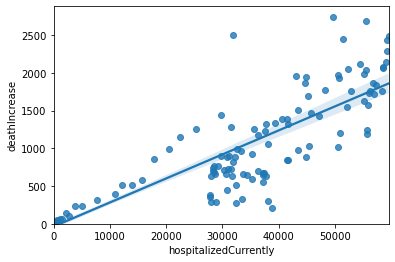

In [14]:
# highly correlated plots with deathIncrease
sns.regplot(x="hospitalizedCurrently", y="deathIncrease", data=coviddf)
plt.ylim(0,)

(0.0, 2877.9996576499434)

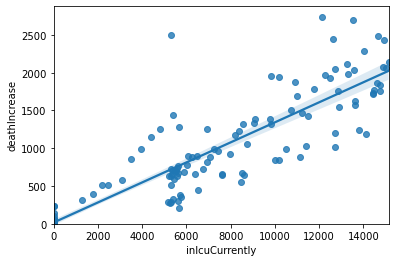

In [15]:
sns.regplot(x="inIcuCurrently", y="deathIncrease", data=coviddf)
plt.ylim(0,)

(0.0, 2877.0)

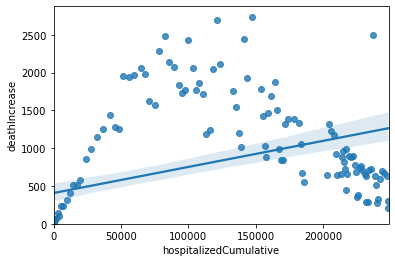

In [16]:
sns.regplot(x="hospitalizedCumulative", y="deathIncrease", data=coviddf)
plt.ylim(0,)

(0.0, 2881.1784748140253)

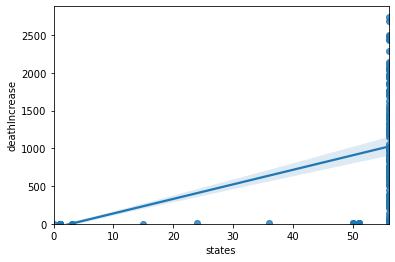

In [17]:
sns.regplot(x="states", y="deathIncrease", data=coviddf)
plt.ylim(0,)

(0.0, 2877.0)

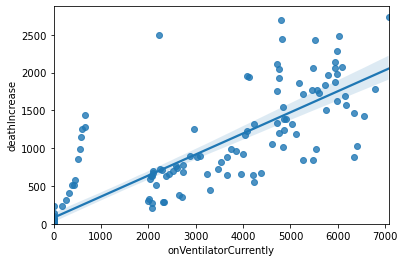

In [18]:
sns.regplot(x="onVentilatorCurrently", y="deathIncrease", data=coviddf)
plt.ylim(0,)

(0.0, 2877.0)

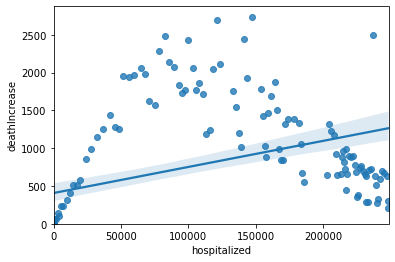

In [19]:
sns.regplot(x="hospitalized", y="deathIncrease", data=coviddf)
plt.ylim(0,)

(0.0, 8252.568743949963)

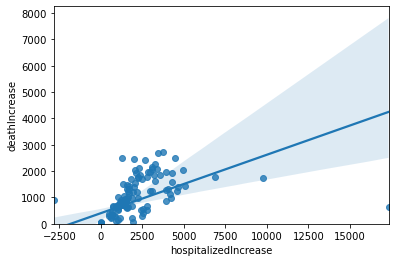

In [20]:
sns.regplot(x="hospitalizedIncrease", y="deathIncrease", data=coviddf)
plt.ylim(0,)

(0.0, 2877.0)

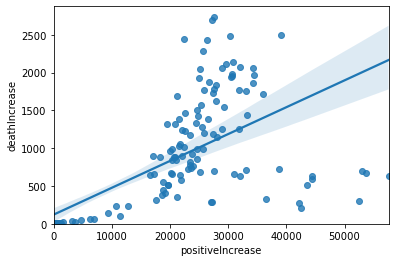

In [21]:
sns.regplot(x="positiveIncrease", y="deathIncrease", data=coviddf)
plt.ylim(0,)

(0.0, 2877.0)

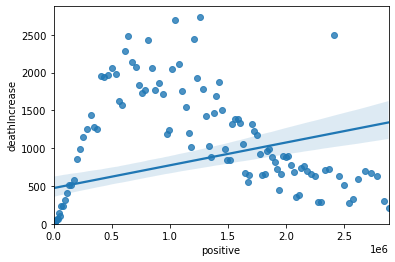

In [22]:
# moderately correlated plots with deathIncrease
sns.regplot(x="positive", y="deathIncrease", data=coviddf)
plt.ylim(0,)

(0.0, 2877.0)

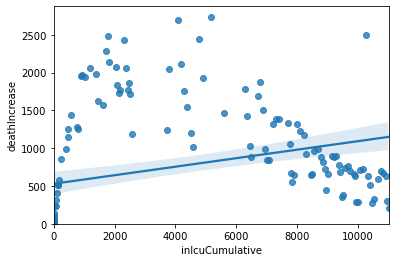

In [23]:
sns.regplot(x="inIcuCumulative", y="deathIncrease", data=coviddf)
plt.ylim(0,)

(0.0, 2877.0)

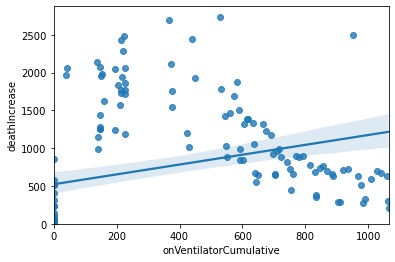

In [24]:
sns.regplot(x="onVentilatorCumulative", y="deathIncrease", data=coviddf)
plt.ylim(0,)

(0.0, 2877.0)

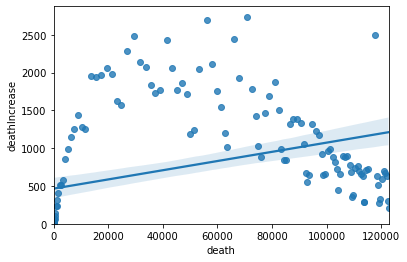

In [25]:
sns.regplot(x="death", y="deathIncrease", data=coviddf)
plt.ylim(0,)

(0.0, 2877.0)

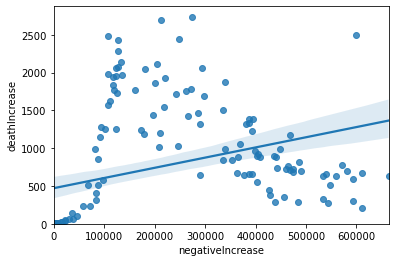

In [26]:
sns.regplot(x="negativeIncrease", y="deathIncrease", data=coviddf)
plt.ylim(0,)

(0.0, 2877.0)

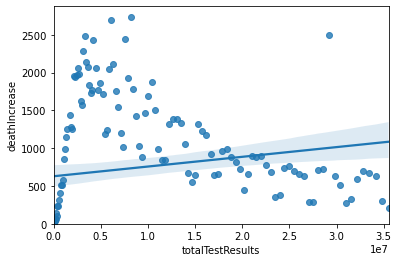

In [27]:
sns.regplot(x="totalTestResults", y="deathIncrease", data=coviddf)
plt.ylim(0,)

In [28]:
group_one=coviddf[['hospitalizedCurrently', 'deathIncrease']]

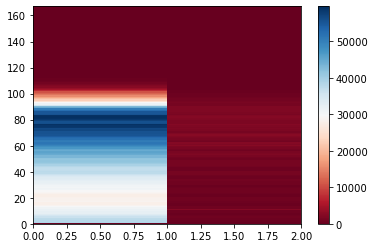

In [29]:
# heat maps of the relationship between deathIncrease and independent variables

plt.pcolor(group_one, cmap='RdBu')
plt.colorbar()
plt.show()

In [30]:
group_two=coviddf[['inIcuCurrently', 'deathIncrease']]

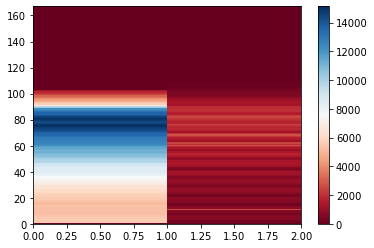

In [31]:
plt.pcolor(group_two, cmap='RdBu')
plt.colorbar()
plt.show()

In [32]:
group_three=coviddf[['positive', 'deathIncrease']]

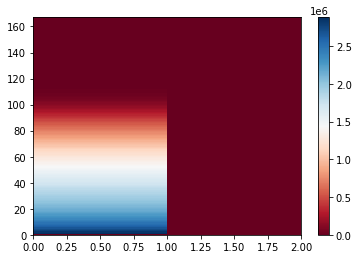

In [33]:
plt.pcolor(group_three, cmap='RdBu')
plt.colorbar()
plt.show()

In [34]:
group_four=coviddf[['death', 'deathIncrease']]

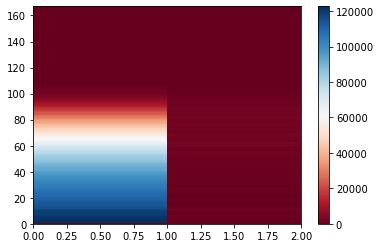

In [35]:
plt.pcolor(group_four, cmap='RdBu')
plt.colorbar()
plt.show()

In [36]:
from scipy import stats

In [37]:
# R^2 and p-value calculations 

pearson_coef, p_value = stats.pearsonr(coviddf['hospitalizedCurrently'], coviddf['deathIncrease'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8966093190388502  with a P-value of P = 2.9322096054409717e-60


In [38]:
pearson_coef, p_value = stats.pearsonr(coviddf['inIcuCurrently'], coviddf['deathIncrease'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.9104045482398356  with a P-value of P = 3.883318974079954e-65


In [39]:
pearson_coef, p_value = stats.pearsonr(coviddf['hospitalizedCumulative'], coviddf['deathIncrease'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.42703136353263693  with a P-value of P = 8.662979736468527e-09


In [40]:
pearson_coef, p_value = stats.pearsonr(coviddf['states'], coviddf['deathIncrease'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.6055594209742476  with a P-value of P = 4.3516990465964855e-18


In [41]:
pearson_coef, p_value = stats.pearsonr(coviddf['onVentilatorCurrently'], coviddf['deathIncrease'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.857982778643148  with a P-value of P = 1.3249716640839441e-49


In [42]:
pearson_coef, p_value = stats.pearsonr(coviddf['hospitalized'], coviddf['deathIncrease'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.42703136353263693  with a P-value of P = 8.662979736468527e-09


In [43]:
pearson_coef, p_value = stats.pearsonr(coviddf['hospitalizedIncrease'], coviddf['deathIncrease'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5869966286074417  with a P-value of P = 7.634516433025797e-17


In [44]:
pearson_coef, p_value = stats.pearsonr(coviddf['positiveIncrease'], coviddf['deathIncrease'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.6763612713153906  with a P-value of P = 1.1211096264657716e-23


In [45]:
pearson_coef, p_value = stats.pearsonr(coviddf['positive'], coviddf['deathIncrease'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.35891824188194477  with a P-value of P = 1.9065550462584495e-06


In [46]:
pearson_coef, p_value = stats.pearsonr(coviddf['inIcuCumulative'], coviddf['deathIncrease'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.29951030796137307  with a P-value of P = 8.420368115268659e-05


In [47]:
pearson_coef, p_value = stats.pearsonr(coviddf['onVentilatorCumulative'], coviddf['deathIncrease'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.3068579697840885  with a P-value of P = 5.496608657574884e-05


In [48]:
pearson_coef, p_value = stats.pearsonr(coviddf['death'], coviddf['deathIncrease'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.3719017342567289  with a P-value of P = 7.474968897238891e-07


In [49]:
pearson_coef, p_value = stats.pearsonr(coviddf['negativeIncrease'], coviddf['deathIncrease'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.35190508619950966  with a P-value of P = 3.10868541838594e-06


In [50]:
pearson_coef, p_value = stats.pearsonr(coviddf['totalTestResults'], coviddf['deathIncrease'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.1748270682663512  with a P-value of P = 0.023838227271141262


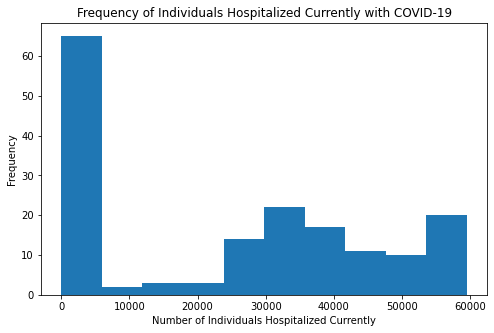

In [51]:
# histogram visualizations of independent variables and deathIncrease

coviddf['hospitalizedCurrently'].plot(kind='hist', figsize=(8, 5))

plt.title('Frequency of Individuals Hospitalized Currently with COVID-19') 
plt.ylabel('Frequency')
plt.xlabel('Number of Individuals Hospitalized Currently') 

plt.show()

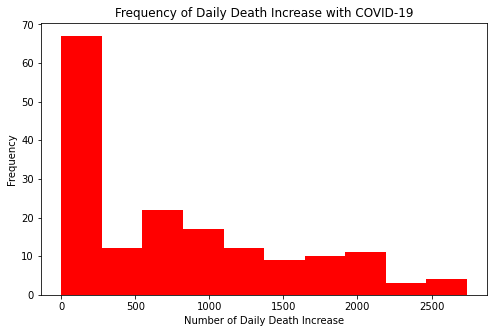

In [52]:
coviddf['deathIncrease'].plot(kind='hist', figsize=(8, 5), color="red")

plt.title('Frequency of Daily Death Increase with COVID-19') 
plt.ylabel('Frequency')
plt.xlabel('Number of Daily Death Increase') 

plt.show()

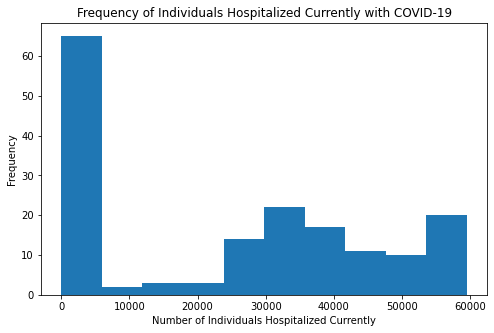

In [53]:
coviddf['hospitalizedCurrently'].plot(kind='hist', figsize=(8, 5))

plt.title('Frequency of Individuals Hospitalized Currently with COVID-19') 
plt.ylabel('Frequency')
plt.xlabel('Number of Individuals Hospitalized Currently') 

plt.show()

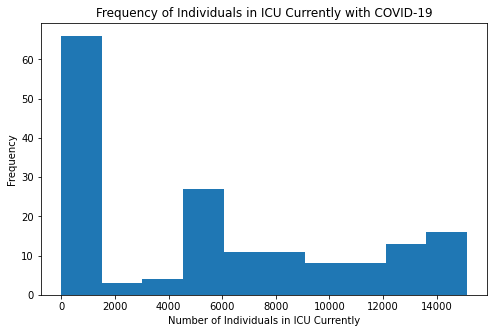

In [54]:
coviddf['inIcuCurrently'].plot(kind='hist', figsize=(8, 5))

plt.title('Frequency of Individuals in ICU Currently with COVID-19') 
plt.ylabel('Frequency')
plt.xlabel('Number of Individuals in ICU Currently') 

plt.show()

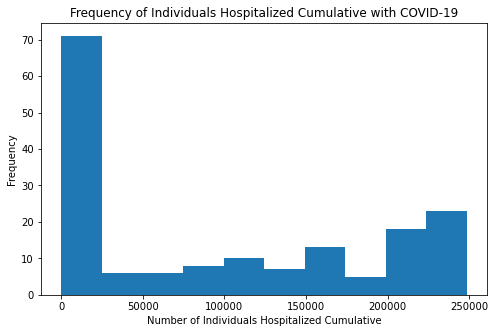

In [55]:
coviddf['hospitalizedCumulative'].plot(kind='hist', figsize=(8, 5))

plt.title('Frequency of Individuals Hospitalized Cumulative with COVID-19') 
plt.ylabel('Frequency')
plt.xlabel('Number of Individuals Hospitalized Cumulative') 

plt.show()

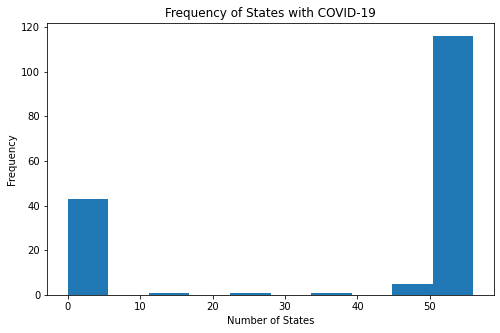

In [56]:
coviddf['states'].plot(kind='hist', figsize=(8, 5))

plt.title('Frequency of States with COVID-19') 
plt.ylabel('Frequency')
plt.xlabel('Number of States') 

plt.show()

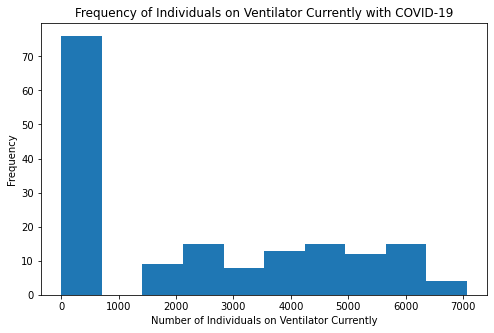

In [57]:
coviddf['onVentilatorCurrently'].plot(kind='hist', figsize=(8, 5))

plt.title('Frequency of Individuals on Ventilator Currently with COVID-19') 
plt.ylabel('Frequency')
plt.xlabel('Number of Individuals on Ventilator Currently') 

plt.show()

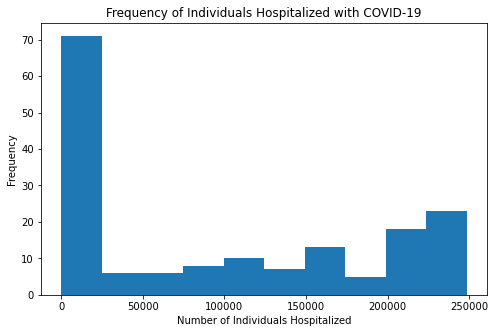

In [58]:
coviddf['hospitalized'].plot(kind='hist', figsize=(8, 5))

plt.title('Frequency of Individuals Hospitalized with COVID-19') 
plt.ylabel('Frequency')
plt.xlabel('Number of Individuals Hospitalized') 

plt.show()

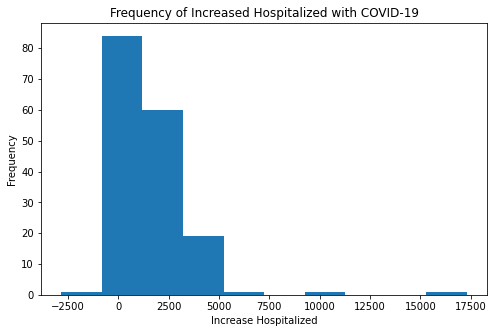

In [59]:
coviddf['hospitalizedIncrease'].plot(kind='hist', figsize=(8, 5))

plt.title('Frequency of Increased Hospitalized with COVID-19') 
plt.ylabel('Frequency')
plt.xlabel('Increase Hospitalized') 

plt.show()

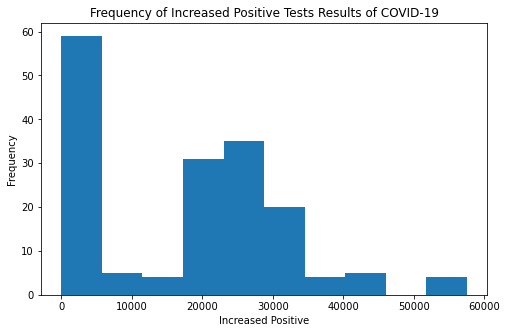

In [60]:
coviddf['positiveIncrease'].plot(kind='hist', figsize=(8, 5))

plt.title('Frequency of Increased Positive Tests Results of COVID-19') 
plt.ylabel('Frequency')
plt.xlabel('Increased Positive') 

plt.show()

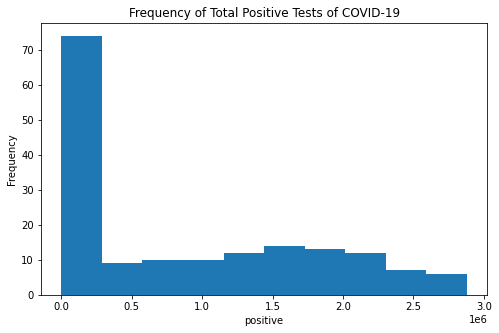

In [61]:
coviddf['positive'].plot(kind='hist', figsize=(8, 5))

plt.title('Frequency of Total Positive Tests of COVID-19') 
plt.ylabel('Frequency')
plt.xlabel('positive') 

plt.show()

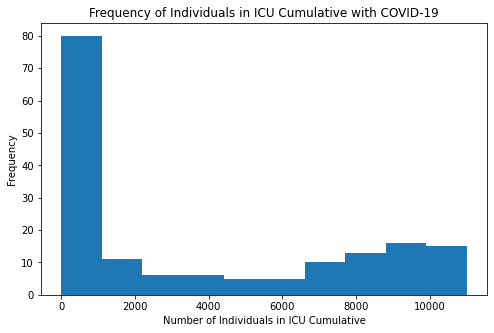

In [62]:
coviddf['inIcuCumulative'].plot(kind='hist', figsize=(8, 5))

plt.title('Frequency of Individuals in ICU Cumulative with COVID-19') 
plt.ylabel('Frequency')
plt.xlabel('Number of Individuals in ICU Cumulative') 

plt.show()

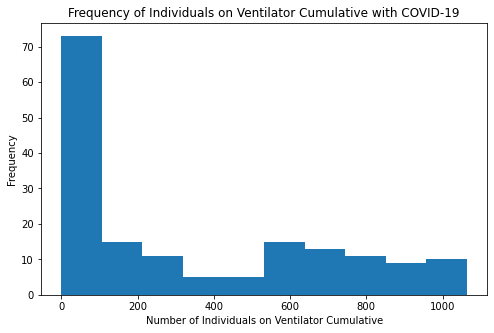

In [63]:
coviddf['onVentilatorCumulative'].plot(kind='hist', figsize=(8, 5))

plt.title('Frequency of Individuals on Ventilator Cumulative with COVID-19') 
plt.ylabel('Frequency')
plt.xlabel('Number of Individuals on Ventilator Cumulative') 

plt.show()

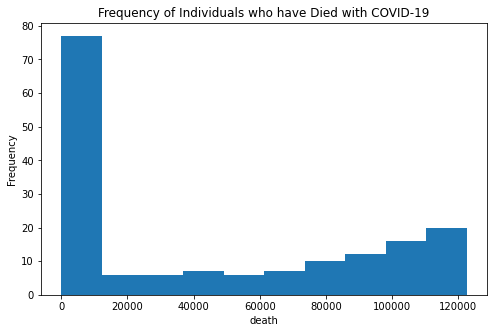

In [64]:
coviddf['death'].plot(kind='hist', figsize=(8, 5))

plt.title('Frequency of Individuals who have Died with COVID-19') 
plt.ylabel('Frequency')
plt.xlabel('death') 

plt.show()

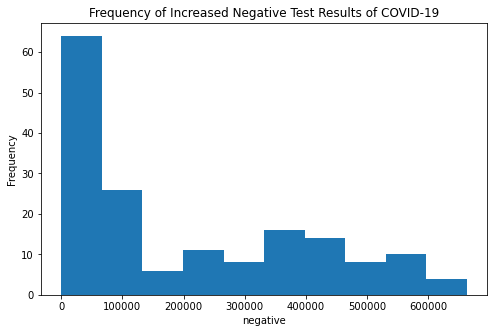

In [65]:
coviddf['negativeIncrease'].plot(kind='hist', figsize=(8, 5))

plt.title('Frequency of Increased Negative Test Results of COVID-19') 
plt.ylabel('Frequency')
plt.xlabel('negative') 

plt.show()

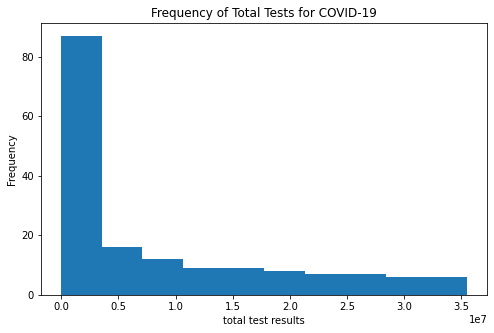

In [66]:
coviddf['totalTestResults'].plot(kind='hist', figsize=(8, 5))

plt.title('Frequency of Total Tests for COVID-19') 
plt.ylabel('Frequency')
plt.xlabel('total test results') 

plt.show()

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
lm = LinearRegression()
lm

LinearRegression()

In [69]:
# VIF calculation for independent variables to check for multicolinearity

# VIF = 1/(1-R^2)

# VIF: states = 2.54, positive = 1.56, hospitalizedCumulative = 1.75, inIcuCumulative = 1.43, onVentilatorCumulative = 1.44, death = 1.59, hospitalized = 1.75, hospitalizedIncrease = 2.42, negativeIncrease = 1.54, positiveIncrease = 3.09, totalTestResultsIncrease = 1.61




In [70]:
z = coviddf[['states', 'positive', 'hospitalizedCumulative', 'inIcuCumulative', 'onVentilatorCumulative', 'death', 'hospitalized', 'hospitalizedIncrease', 'negativeIncrease', 'positiveIncrease', 'totalTestResultsIncrease']]

In [71]:
# fitted multivariate regression model 

lm.fit(z, coviddf['deathIncrease'])

LinearRegression()

In [72]:
# model intercept

lm.intercept_

5.281093521616981

In [73]:
# model coefficients

lm.coef_

array([-2.02585613, -0.00345714,  0.00919381, -0.46634104,  1.47048611,
        0.05924686,  0.00919381, -0.00477399, -0.01976211,  0.03800148,
        0.01823937])

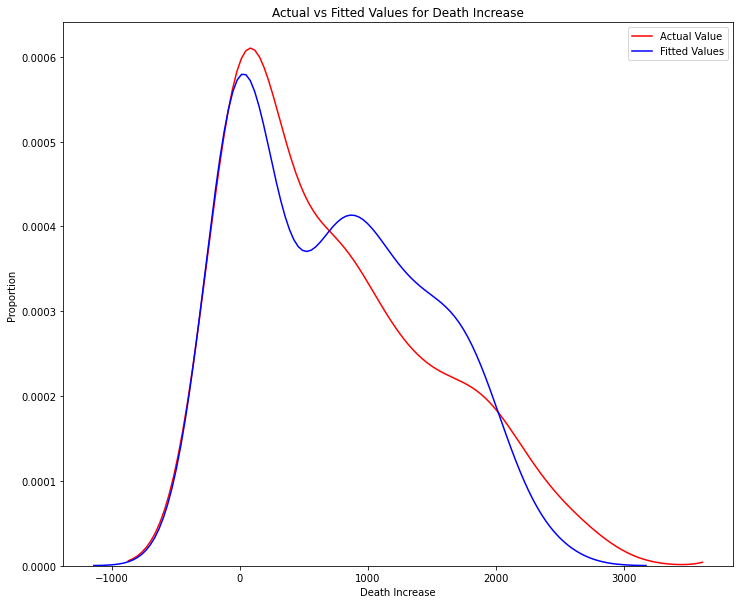

In [74]:
# graph showing difference between fitted values and actual values in my model to check accuracy


width = 12
height = 10
Yhat = lm.predict(z)
plt.figure(figsize=(width, height))


ax1 = sns.distplot(coviddf['deathIncrease'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Death Increase')
plt.xlabel('Death Increase')
plt.ylabel('Proportion')

plt.show()
plt.close()

In [75]:
# R^2 value of my model

lm.fit(z, coviddf['deathIncrease'])

print('The R-square is: ', lm.score(z, coviddf['deathIncrease']))

The R-square is:  0.8499028266728119


In [76]:
# mean squared error value of my model

from sklearn.metrics import mean_squared_error
Y_predict_multifit = lm.predict(z)
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(coviddf['deathIncrease'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  86716.14232971985


In [77]:
y_data = coviddf['deathIncrease']

In [78]:
x_data=coviddf.drop('deathIncrease',axis=1)

In [104]:
# splitting data into training and testing set to evaluate the efficacy of my model

from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state = 0)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 26
number of training samples: 141


In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
lre=LinearRegression()

In [82]:
# fitted model for training set data 

lre.fit(x_train, y_train)

LinearRegression()

In [83]:
# predicted values for test set

predictions = lre.predict(x_test)

In [105]:
# test set score

lre.score(x_test, y_test)

0.9233417291214243

In [106]:
# training set score

lre.score(x_train, y_train)

0.9166831553460977

In [86]:
# performed cross validation to solve problems with overfitting of my data

from sklearn.model_selection import cross_val_score

In [92]:
Rcross = cross_val_score(lre, x_data, y_data, cv=10)
Rcross

array([-1.50739038e+07,  4.31820831e-01, -5.58721163e-01, -3.82125857e-03,
        1.19574587e-01,  6.92838437e-01, -1.53101666e-01, -1.66296441e+02,
        0.00000000e+00,  0.00000000e+00])

In [93]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are -1507406.9552298249 and the standard deviation is 4522165.610011063


In [94]:
-1 * cross_val_score(lre,x_data, y_data, scoring='neg_mean_squared_error')

array([1.69360043e+12, 3.83096100e+05, 1.04562483e+06, 3.94958380e+05,
       9.30950704e+01])

In [95]:
from sklearn.model_selection import cross_val_predict

In [96]:
yhat = cross_val_predict(lre,x_data, y_data,cv=10)
yhat[0:5]

array([-8.36406927e+06, -1.70449452e+03, -1.04989405e+03, -5.37070663e+02,
       -1.73876737e+02])